In [3]:
#Import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import itertools
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [2]:
#Set the directory to the current location of file

import os
path = "/Users/krittikakrishnan/Downloads"
os.chdir(path) #To change path to current directory

In [4]:
#Read in the data
df2013 = pd.read_csv ("NSFG 2013 - 2015.csv", delimiter = ",")
df2011 = pd.read_csv ("NSFG_2011_2013.csv", delimiter = ",")
df2006 = pd.read_csv ("NSFG_2006_2010_Data.csv", delimiter = ",")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,31,32,33,36,37,38,41,42,45,66,78,79,80,81,91,94,95,96,98,99,100,101,102,103,104,105,106,111,114,115,116,117,118,121,122,123,124,125,126,127,128,129,130,131,132,133,134,137,141,142,145,146,148,149,150,151,152,153,157,161,162,165,166,168,169,170,172,173,177,181,182,185,186,188,189,190,192,193,208,209,210,212,213,228,229,230,232,233,248,249,250,252,253,257,261,262,265,266,268,269,270,272,273,288,289,290,292,293,297,308,309,310,312,313,328,329,330,332,333,348,349,350,352,353,357,361,362,365,366,368,369,370,372,373,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,416,417,421,422,423,424,425,426,427,428,431,432,444,445,446,449,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,471,472,473,484,485,486,487,488,489,490,492,493,497,498,499,500,501,502,503,507,508,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,531,

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (29,31,32,33,36,37,38,41,42,43,62,66,68,69,74,75,76,77,87,90,94,95,96,97,98,99,101,102,103,104,109,112,115,116,117,118,119,120,121,123,124,125,126,128,129,130,131,132,133,134,137,138,139,140,141,142,146,147,148,149,150,151,152,153,154,155,156,159,163,164,168,169,170,172,173,174,175,176,177,178,181,185,186,187,189,190,191,192,193,194,195,196,197,198,199,200,203,207,208,209,210,211,212,213,214,216,217,218,219,220,221,225,238,239,240,241,242,243,260,261,262,263,264,265,282,283,284,285,286,287,304,305,306,307,308,309,313,326,327,328,329,330,331,348,349,350,351,352,353,370,371,372,374,375,392,393,394,395,396,397,414,415,416,417,418,419,436,437,438,440,441,458,459,460,462,463,480,481,482,484,485,502,503,504,506,507,527,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,551,552,553,554,557,558,559,560,561,562,563,564,567,568,580,582,583,588,591,592,593,594,595,596,597,5

In [4]:
df2006.head(10)

,CASEID,RSCRNINF,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,CMBIRTH,AGESCRN,MARSTAT,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN5YR,QUESTYEAR,QUARTER,PHASE,INTVLNGTH
0,34156,Yes,40 years,No,White,43 years,43 years,799,43 years,Never been married,...,2,105,1323,1311,1285,1261,4,15,2,47.009998
1,40081,Yes,33 years,No,White,33 years,33 years,925,33 years,Married,...,2,105,1323,1311,1285,1261,4,15,2,102.1
2,32817,No,26 years,No,1,27 years,27 years,958,27 years,Never been married,...,2,105,1287,1275,1249,1225,Questionnaire version year 1,3,1,57.189999
3,39968,Yes,37 years,No,White,37 years,37 years,869,37 years,Never been married,...,2,105,1323,1311,1285,1261,4,15,2,47.919998
4,27121,Yes,23 years,No,White,23 years,23 years,1004,23 years,Never been married,...,2,105,1285,1273,1249,1225,Questionnaire version year 1,3,1,55.959999
5,39492,Yes,33 years,No,White,33 years,33 years,923,33 years,Never been married,...,2,105,1322,1310,1285,1261,4,15,1,92.970001
6,41311,No,25 years,No,White,25 years,25 years,1011,25 years,Never been married,...,2,105,1323,1311,1285,1261,4,15,1,69.529999
7,27362,No,24 years,No,2,24 years,24 years,994,24 years,Never been married,...,2,105,1286,1274,1249,1225,Questionnaire version year 1,3,1,65.699997
8,36313,No,28 years,No,White,28 years,28 years,974,28 years,Never been married,...,2,105,1321,1309,1285,1261,4,15,1,52.849998
9,41474,No,44 years,No,White,44,44,789,44 years,Not married but living together with a partner...,...,2,105,1322,1310,1285,1261,4,15,1,85.75


In [5]:
#See the first ten rows
# df.head(10)

#Convert to dataframe
df2006 = pd.DataFrame(data = df2006)
df2011 = pd.DataFrame(data = df2011)
df2013 = pd.DataFrame(data = df2013)

# df.head(10)

In [6]:
#Convert variable "RSCAGE" to string from "object" classification
df2013['RSCRAGE'] = df2013['RSCRAGE'].astype(str)
df2013['RSCRAGE']

# Strip variable "RSCRAGE" of non-numeric characters
df2013['RSCRAGE'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df2013

,CASEID,RSCRNINF,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,CMBIRTH,AGESCRN,MARSTAT,...,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR,INTVLNGTH
0,60418,No,38,No,White,38 years,38 years,921,38 years,Not married but living together with a partner...,...,342,1381,1369,1345,1333,1321,14,1,2015,112.78
1,60419,No,37,No,White,37 years,37 years,942,37 years,Not married but living together with a partner...,...,318,1388,1376,1345,1333,1321,16,1,2015,80.50
2,60420,No,35,No,Black or African American,33 years,33 years,981,33 years,Never been married,...,339,1388,1376,1345,1333,1321,16,1,2015,65.10
3,60423,Yes,31,No,Black or African American,31 years,31 years,1010,31 years,Never been married,...,355,1387,1375,1345,1333,1321,16,1,2015,65.74
4,60426,No,39,No,White,39 years,39 years,897,39 years,Married to a person of the opposite sex,...,344,1368,1356,1321,1309,1297,9,1,2013,51.63
5,60429,No,19,No,White,19 years,19 years,1141,19 years,Never been married,...,358,1369,1357,1333,1321,1309,10,1,2014,72.33
6,60430,No,31,No,Black or African American,31 years,31 years,1009,31 years,"Separated, because you and your spouse are not...",...,304,1385,1373,1345,1333,1321,15,1,2015,63.86
7,60433,No,15,No,White,16 years,16 years,1180,15 years,Never been married,...,335,1373,1361,1333,1321,1309,11,1,2014,40.27
8,60434,Yes,24,Yes,Hispanic,24 years,24 years,1076,24 years,"Separated, because you and your spouse are not...",...,301,1374,1362,1333,1321,1309,12,1,2014,106.39
9,60435,Yes,29,Yes,Hispanic,29 years,29 years,1012,29 years,Married to a person of the opposite sex,...,360,1370,1358,1333,1321,1309,10,1,2014,86.12


In [7]:
#Convert variable "RSCAGE" to string from "object" classification
df2011['RSCRAGE'] = df2011['RSCRAGE'].astype(str)
df2011['RSCRAGE']

# Strip variable "RSCRAGE" of non-numeric characters
df2011['RSCRAGE'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df2011

,CASEID,RSCRNINF,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,CMBIRTH,AGESCRN,MARSTAT,...,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR,INTVLNGTH
0,50002,Yes,36,Yes,Hispanic,36 years,36 years,922,36 years,"Separated, because you and your spouse are not...",...,363,1357,1345,1321,1309,1297,6,1.0,2013,78.34
1,50004,Yes,29,No,Black or African American,29 years,29 years,986,29 years,"Separated, because you and your spouse are not...",...,332,1343,1331,1297,1285,1273,1,1.0,2011,70.31
2,50005,No,29,Yes,Hispanic,29 years,29 years,1001,29 years,Not married but living together with a partner...,...,328,1361,1349,1321,1309,1297,7,1.0,2013,91.45
3,50008,Yes,43,No,Black or African American,43 years,43 years,834,43 years,Never been married,...,317,1354,1342,1309,1297,1285,5,1.0,2012,95.61
4,50013,No,19,No,White,19 years,19 years,1127,19 years,Never been married,...,306,1364,1352,1321,1309,1297,8,1.0,2013,35.40
5,50015,Yes,33,No,White,33 years,33 years,955,33 years,Divorced or annulled,...,362,1357,1345,1321,1309,1297,6,1.0,2013,108.71
6,50018,No,15,Yes,Hispanic,15 years,15 years,1153,15 years,Never been married,...,326,1342,1330,1297,1285,1273,1,1.0,2011,50.06
7,50022,No,38,Yes,Hispanic,39 years,39 years,873,39 years,Married to a person of the opposite sex,...,303,1343,1331,1297,1285,1273,1,1.0,2011,77.36
8,50024,No,26,No,White,27 years,27 years,1015,27 years,Married to a person of the opposite sex,...,361,1342,1330,1297,1285,1273,1,1.0,2011,93.04
9,50026,No,16,Yes,Hispanic,16 years,16 years,1163,16 years,Never been married,...,323,1359,1347,1321,1309,1297,6,1.0,2013,39.17


In [8]:
#Convert variable "RSCAGE" to string from "object" classification
df2006['RSCRAGE'] = df2006['RSCRAGE'].astype(str)
df2006['RSCRAGE']

# Strip variable "RSCRAGE" of non-numeric characters
df2006['RSCRAGE'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df2006

,CASEID,RSCRNINF,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,CMBIRTH,AGESCRN,MARSTAT,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN5YR,QUESTYEAR,QUARTER,PHASE,INTVLNGTH
0,34156,Yes,40,No,White,43 years,43 years,799,43 years,Never been married,...,2,105,1323,1311,1285,1261,4,15,2,47.009998
1,40081,Yes,33,No,White,33 years,33 years,925,33 years,Married,...,2,105,1323,1311,1285,1261,4,15,2,102.1
2,32817,No,26,No,1,27 years,27 years,958,27 years,Never been married,...,2,105,1287,1275,1249,1225,Questionnaire version year 1,3,1,57.189999
3,39968,Yes,37,No,White,37 years,37 years,869,37 years,Never been married,...,2,105,1323,1311,1285,1261,4,15,2,47.919998
4,27121,Yes,23,No,White,23 years,23 years,1004,23 years,Never been married,...,2,105,1285,1273,1249,1225,Questionnaire version year 1,3,1,55.959999
5,39492,Yes,33,No,White,33 years,33 years,923,33 years,Never been married,...,2,105,1322,1310,1285,1261,4,15,1,92.970001
6,41311,No,25,No,White,25 years,25 years,1011,25 years,Never been married,...,2,105,1323,1311,1285,1261,4,15,1,69.529999
7,27362,No,24,No,2,24 years,24 years,994,24 years,Never been married,...,2,105,1286,1274,1249,1225,Questionnaire version year 1,3,1,65.699997
8,36313,No,28,No,White,28 years,28 years,974,28 years,Never been married,...,2,105,1321,1309,1285,1261,4,15,1,52.849998
9,41474,No,44,No,White,44,44,789,44 years,Not married but living together with a partner...,...,2,105,1322,1310,1285,1261,4,15,1,85.75


In [9]:
#To drop specific columns from the dataframe
df2006['MARSTAT'].unique()

array(['Never been married', 'Married',
       'Not married but living together with a partner of the opposite sex',
       'Divorced',
       'Separated, because you and your spouse are not getting along',
       'Widowed'], dtype=object)

In [10]:
df2013 = df2013[df2013.RSCRRACE != '1']
df2013 = df2013[df2013.RSCRRACE != '2']
df2013 = df2013[df2013.RSCRRACE != '3']

df2013.RSCRRACE.unique()

array(['White', 'Black or African American', 'Hispanic'], dtype=object)

In [11]:
df2011 = df2011[df2011.RSCRRACE != '1']
df2011 = df2011[df2011.RSCRRACE != '2']
df2011 = df2011[df2011.RSCRRACE != '3']
df2011 = df2011[df2011.RSCRRACE != 'Not ascertained']

df2011.RSCRRACE.unique()

array(['Hispanic', 'Black or African American', 'White'], dtype=object)

In [12]:
df2006 = df2006[df2006.RSCRRACE != '1']
df2006 = df2006[df2006.RSCRRACE != '2']
df2006 = df2006[df2006.RSCRRACE != '3']
df2006 = df2006[df2006.RSCRRACE != 'Not ascertained']

df2006.RSCRRACE.unique()

array(['White', 'Hispanic', 'Black or African American'], dtype=object)

In [13]:
#Subset specific columns from each dataframe and join the three dataframes together
##Columns wanted: CASEID, RSCRAGE, RSCRRACE, MARSTAT(relationship status), NOWCOVER01 (insurance coverage), CURRMETH1

df2006_sub = df2006[['CASEID', 'RSCRAGE', 'RSCRRACE', 'MARSTAT', 'NOWCOVER01', 'CURRMETH1']]
df2011_sub = df2011[['CASEID', 'RSCRAGE', 'RSCRRACE', 'MARSTAT', 'NOWCOVER01', 'CURRMETH1']]
df2013_sub = df2013[['CASEID', 'RSCRAGE', 'RSCRRACE', 'MARSTAT', 'NOWCOVER01', 'CURRMETH1']]

df2006_sub

,CASEID,RSCRAGE,RSCRRACE,MARSTAT,NOWCOVER01,CURRMETH1
0,34156,40,White,Never been married,NaN,NaN
1,40081,33,White,Married,Private health insurance plan (from employer/p...,No method used
3,39968,37,White,Never been married,Private health insurance plan (from employer/p...,No method used
4,27121,23,White,Never been married,Private health insurance plan (from employer/p...,No method used
5,39492,33,White,Never been married,Not covered by any insurance,No method used
6,41311,25,White,Never been married,NaN,No method used
8,36313,28,White,Never been married,NaN,"IUD, coil, or loop"
9,41474,44,White,Not married but living together with a partner...,Private health insurance plan (from employer/p...,"Withdrawal, pulling out"
10,34793,24,White,Never been married,Private health insurance plan (from employer/p...,Birth control pills
13,41544,34,White,Never been married,Private health insurance plan (from employer/p...,Birth control pills


In [19]:
#Join the three dfs together 

# dfs = df2006_sub.append(df2011_sub)
# dff = dfs.append(df2013_sub)
# dff = dfs.append(df2013_sub)

# dff

# dffs = dff.reset_index()

new = dffs.drop('index', axis = 1)

# dffs

In [20]:
new['CURRMETH1'].unique()

array([nan, 'No method used', 'IUD, coil, or loop',
       'Withdrawal, pulling out', 'Birth control pills',
       'Vaginal contraceptive ring',
       'Female sterilizing operation, such as tubal sterilization and hysterectomy',
       'Safe period by temperature or cervical mucus test, natural family planning',
       'Condom', "Partner's vasectomy", 'Respondent was sterile',
       'Depo-Provera, injectables', 'Rhythm or safe period by calendar',
       'Hormonal implant (Norplant or Implanon)', 'Contraceptive patch',
       'Suppository, insert', 'Refused', 'Other method -- specify',
       'Lunelle injectable (monthly shot)',
       "Respondent's partner was sterile", 'Diaphragm', 'Foam',
       'Emergency contraception', "Don't know", 'Jelly or cream',
       'Female condom, vaginal pouch', 'Today sponge',
       'Hormonal implant (Norplant, Implanon, or Nexplanon)',
       'Calendar rhythm, Standard Days, or Cycle Beads method',
       'Safe period by temperature or cervical mu

In [23]:
#Find out where the weird stuff is in the "BC" variable and drop it
#Drop methods not above 50 in above plot
# df = new[~new['CURRMETH1'].isin(['Calendar rhythm, Standard Days, or Cycle Beads method',
#                                'No method used', 'Withdrawal, pulling out', 'Other method -- specify',
#                                'Safe period by temperature or cervical mucus test (Two Day, Billings Ovulation, or Sympto-thermal Method)', 
#                                'Respondent was sterile',
#                               "Respondent's partner was sterile",
#                               'Suppository, insert', 'Refused', 'Foam', 'Diaphragm', 'Emergency contraception',
#                                "Don't know", 'Jelly or cream', 'Today sponge', 'Refused', 'Rhythm or safe period by calendar',"Partner's vasectomy",
#                                  'Safe period by temperature or cervical mucus test, natural family planning'
#                               ])]
# df['CURRMETH1'].replace('', np.nan, inplace=True)
# df.dropna(subset=['CURRMETH1'], inplace=True)
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Female sterilizing operation, such as tubal sterilization and hysterectomy', 'Tubal ligation')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Female condom, vaginal pouch', 'Female condom')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('IUD, coil, or loop', 'IUD')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Female condom', 'Condom')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Birth control pills', 'Pills')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Vaginal contraceptive ring', 'Vaginal ring')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Depo-Provera, injectables', 'Depo-Provera')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Hormonal implant \(Norplant or Implanon\)', 'Implant')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Hormonal implant \(Norplant, Implanon, or Nexplanon\)', 'Implant')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Lunelle injectable \(monthly shot\)', 'Implant')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Contraceptive patch', 'Patch')
df["CURRMETH1"] = df["CURRMETH1"].str.replace('Depo-Provera', 'Depo-Provera Shot')
df = df[~df['CURRMETH1'].isin(["Partner's vasectomy", 'Safe period by temperature or cervical mucus test, natural family planning'])]
df.CURRMETH1.unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

array(['IUD', 'Pills', 'Vaginal ring', 'Tubal ligation', 'Condom',
       'Depo-Provera Shot', 'Implant', 'Patch'], dtype=object)

In [25]:
# df = df.reset_index()
# 
df = df.drop(['index'], axis = 1)
df

,CASEID,RSCRAGE,RSCRRACE,MARSTAT,NOWCOVER01,CURRMETH1
0,36313,28,White,Never been married,NaN,IUD
1,34793,24,White,Never been married,Private health insurance plan (from employer/p...,Pills
2,41544,34,White,Never been married,Private health insurance plan (from employer/p...,Pills
3,40080,28,White,Not married but living together with a partner...,NaN,Vaginal ring
4,33303,42,White,Married,NaN,IUD
5,38594,44,White,Married,Private health insurance plan (from employer/p...,Tubal ligation
6,26674,19,White,Never been married,Private health insurance plan (from employer/p...,Pills
7,28488,39,White,Married,NaN,Condom
8,37022,37,Hispanic,Married,Private health insurance plan (from employer/p...,Tubal ligation
9,26553,40,White,Married,NaN,Tubal ligation


In [26]:
#Find out where the weird stuff is in the "MARSTAT" variable and drop it

df = df[~df['MARSTAT'].isin(["Don't know"])]

df["MARSTAT"] = df["MARSTAT"].str.replace('Not married but living together with a partner of the opposite sex', 'In a Relationship')
df["MARSTAT"] = df["MARSTAT"].str.replace('Never been married', 'Single')
df["MARSTAT"] = df["MARSTAT"].str.replace('Married to a person of the opposite sex', 'Married')
df["MARSTAT"] = df["MARSTAT"].str.replace('Divorced', 'Single')
df["MARSTAT"] = df["MARSTAT"].str.replace('Separated, because you and your spouse are not getting along', 'Single')
df["MARSTAT"] = df["MARSTAT"].str.replace('Widowed', 'Single')
df["MARSTAT"] = df["MARSTAT"].str.replace('Single or annulled', 'Single')

df.MARSTAT.unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

array(['Single', 'In a Relationship', 'Married'], dtype=object)

In [27]:
df.tail(10)

,CASEID,RSCRAGE,RSCRRACE,MARSTAT,NOWCOVER01,CURRMETH1
11183,70606,43,White,Married,Medicaid-additional name(s) for Medicaid in th...,Tubal ligation
11184,70607,43,White,Married,NaN,Pills
11185,70608,39,White,Single,Medicaid-additional name(s) for Medicaid in th...,Pills
11186,70609,36,Hispanic,Married,Private health insurance plan (from employer o...,Condom
11187,70612,40,Hispanic,Married,NaN,Tubal ligation
11188,70613,29,Hispanic,Married,Private health insurance plan (from employer o...,Condom
11189,70614,35,Hispanic,Married,NaN,Tubal ligation
11190,70615,20,Hispanic,Married,NaN,Implant
11191,70616,40,Hispanic,Single,Medicare,Tubal ligation
11192,70620,17,Black or African American,Single,NaN,Pills


In [29]:
df_sum = df.CURRMETH1.value_counts()

In [30]:
df_sum

Pills                3516
Tubal ligation       2765
Condom               2559
IUD                  1128
Depo-Provera Shot     665
Vaginal ring          257
Implant               207
Patch                  95
Name: CURRMETH1, dtype: int64

In [31]:
df_sum = pd.DataFrame(df_sum)

In [33]:
df_sum.columns=['sum']

In [34]:
df_sum = df_sum.sort_values('sum', ascending = False)

In [36]:
df_sum.to_csv("NSFG Demographics of Interest.csv")

In [ ]:
#Plotting a histogram of race of responders
race = df['RSCRRACE']
plt.hist(race, edgecolor = 'black')
plt.title("Demographics: Race")
plt.ylabel("Number of Responders")

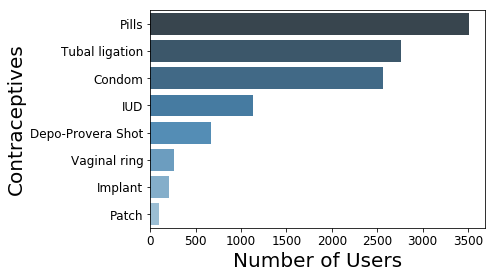

In [31]:
#Plotting a histogram of method of BC
method = df['CURRMETH1']
# plt.hist(method, edgecolor = 'black')
# plt.title("Demographics: BC Method")
# plt.ylabel("Number of Responders")
# plt.xticks(rotation=75)

method_plot = sns.barplot(x=df.CURRMETH1.value_counts(), y=df.CURRMETH1.value_counts().index, palette = "Blues_d")
method_plot.set_xlabel('Number of Users', fontsize = 20)
method_plot.set_ylabel('Contraceptives', fontsize = 20)
method_plot.tick_params(labelsize = 12)

Text(0,0.5,'Number of Users')

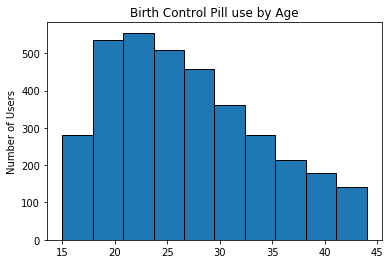

In [32]:
##Plotting a histogram of method of BC by age
count_of_bc = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Pills' in df['CURRMETH1'][i]:
        count_of_bc.append(int(df['RSCRAGE'][i]))
# print(count_of_bc)

bc_by_age = plt.hist(count_of_bc, edgecolor = 'black')
plt.title("Birth Control Pill use by Age")
plt.ylabel("Number of Users")
# plt.xticks(rotation=75)

Text(0,0.5,'Number of Users')

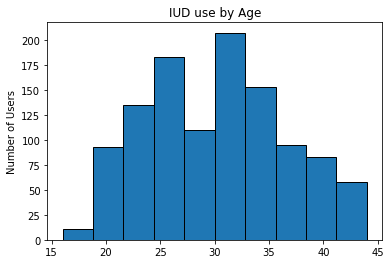

In [33]:
count_of_iud = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'IUD' in df['CURRMETH1'][i]:
        count_of_iud.append(int(df['RSCRAGE'][i]))
# print(count_of_bc)

iud_by_age = plt.hist(count_of_iud, edgecolor = 'black')
plt.title("IUD use by Age")
plt.ylabel("Number of Users")

Text(0,0.5,'Number of Users')

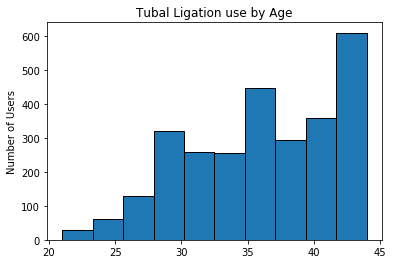

In [34]:
count_of_tube = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Tubal ligation' in df['CURRMETH1'][i]:
        count_of_tube.append(int(df['RSCRAGE'][i]))
# print(count_of_bc)

tube_by_age = plt.hist(count_of_tube, edgecolor = 'black')
plt.title("Tubal Ligation use by Age")
plt.ylabel("Number of Users")

Text(0,0.5,'Number of Users')

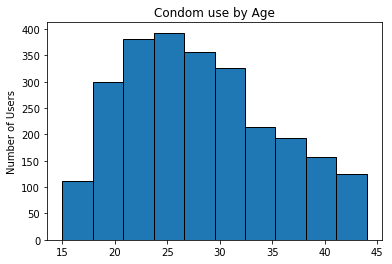

In [35]:
count_of_condom = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Condom' in df['CURRMETH1'][i]:
        count_of_condom.append(int(df['RSCRAGE'][i]))
# print(count_of_bc)

condom_by_age = plt.hist(count_of_condom, edgecolor = 'black')
plt.title("Condom use by Age")
plt.ylabel("Number of Users")

In [ ]:
plt.figure(figsize =(8,8))

bins = np.linspace(15, 45, 10)
s1 = plt.subplot(2,2,1)
s2 = plt.subplot(2,2,4)
s3 = plt.subplot(2,2,3)
s4 = plt.subplot(2,2,2)
s1.hist(count_of_bc, bins, alpha=0.5, label='BC', edgecolor = 'black', color = 'Blue')
s2.hist(count_of_iud, bins, alpha=0.5, label='IUD', edgecolor = 'black', color = 'Red')
s3.hist(count_of_tube, bins, alpha=0.5, label='Tubal ligation', edgecolor = 'black')
s4.hist(count_of_condom, bins, alpha=0.5, label='Condom', edgecolor = 'black', color = 'Green')

s1.set(ylim = [0,800])
s2.set(ylim = [0,800])
s3.set(ylim = [0,800])
s4.set(ylim = [0,800])

s1.set_xlabel('Age', fontsize = 15)
s2.set_xlabel('Age', fontsize = 15)
s3.set_xlabel('Age', fontsize = 15)
s4.set_xlabel('Age', fontsize = 15)

s1.set_ylabel('Number of Users', fontsize = 15)
s2.set_ylabel('Number of Users', fontsize = 15)
s3.set_ylabel('Number of Users', fontsize = 15)
s4.set_ylabel('Number of Users', fontsize = 15)

s1.set_title("Pill use by Age", fontsize = 20)
s2.set_title("IUD use by Age", fontsize = 20)
s3.set_title("Tubal ligation use by Age", fontsize = 20)
s4.set_title("Condom use by Age", fontsize = 20)

s1.tick_params(labelsize = 12)
s2.tick_params(labelsize = 12)
s3.tick_params(labelsize = 12)
s4.tick_params(labelsize = 12)
# method_plot.tick_params(labelsize = 12)

plt.tight_layout()

In [ ]:
condom_by_ethn = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Condom' in df['CURRMETH1'][i]:
        condom_by_ethn.append((df['RSCRRACE'][i]))
# print(count_of_bc)

condom_by_ethn = plt.hist(condom_by_ethn, edgecolor = 'black')
plt.title("Condom use by Ethnicity")
plt.ylabel("Number of Users")

In [ ]:
iud_by_ethn = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'IUD' in df['CURRMETH1'][i]:
        iud_by_ethn.append((df['RSCRRACE'][i]))
# print(count_of_bc)

iud_by_ethn = plt.hist(iud_by_ethn, edgecolor = 'black')
plt.title("IUD use by Ethnicity")
plt.ylabel("Number of Users")

In [ ]:
tubal_by_ethn = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Tubal ligation' in df['CURRMETH1'][i]:
        tubal_by_ethn.append((df['RSCRRACE'][i]))
# print(count_of_bc)

tubal_by_ethn = plt.hist(tubal_by_ethn, edgecolor = 'black')
plt.title("Tubal ligation use by Ethnicity")
plt.ylabel("Number of Users")

In [ ]:
pill_by_ethn = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Pills' in df['CURRMETH1'][i]:
        pill_by_ethn.append((df['RSCRRACE'][i]))
# print(count_of_bc)

pill_by_ethn = plt.hist(pill_by_ethn, edgecolor = 'black')
plt.title("Pill use by Ethnicity")
plt.ylabel("Number of Users")

In [ ]:
sing_by_age = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Single' in df['MARSTAT'][i]:
        sing_by_age.append((df['RSCRAGE'][i]))
# print(count_of_bc)

sing_by_age = plt.hist(sing_by_age, edgecolor = 'black')
plt.title("Single by Age")
plt.ylabel("Number of Users")

In [ ]:
relat_by_age = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'In a Relationship' in df['MARSTAT'][i]:
        relat_by_age.append((df['RSCRAGE'][i]))
# print(count_of_bc)

relat_by_age = plt.hist(relat_by_age, edgecolor = 'black')
plt.title("Relationship by Age")
plt.ylabel("Number of Users")

In [ ]:
marr_by_age = []
for i in df.index.values:
#     print(i)
#     print(df['CURRMETH1'][i])
    if 'Married' in df['MARSTAT'][i]:
        marr_by_age.append((df['RSCRAGE'][i]))
# print(count_of_bc)

marr_by_age = plt.hist(marr_by_age, edgecolor = 'black')
plt.title("Married by Age")
plt.ylabel("Number of Users")

In [38]:
##Splitting the data into semipermanent and impermanent forms of BC
semiperm = df[~df['CURRMETH1'].isin(["Pills", "Patch", "Vaginal ring", "Condom"])]
imperm = df[~df['CURRMETH1'].isin(["IUD", "Tubal ligation", "Depo-Provera Shot", "Implant"])]

semiperm.head(10)

,CASEID,RSCRAGE,RSCRRACE,MARSTAT,NOWCOVER01,CURRMETH1
0,36313,28,White,Single,NaN,IUD
4,33303,42,White,Married,NaN,IUD
5,38594,44,White,Married,Private health insurance plan (from employer/p...,Tubal ligation
8,37022,37,Hispanic,Married,Private health insurance plan (from employer/p...,Tubal ligation
9,26553,40,White,Married,NaN,Tubal ligation
14,28179,41,White,Married,NaN,Tubal ligation
21,30463,33,White,Single,Private health insurance plan (from employer/p...,Tubal ligation
24,29053,27,White,Married,NaN,IUD
28,31492,43,White,Married,Private health insurance plan (from employer/p...,Tubal ligation
33,27518,41,White,Married,NaN,Tubal ligation


In [39]:
####THINGS TO DO IN NAIVE BAYES CLASSIFICATION:
"""1. Make sure your data frame is subsetted to only the columns that you need.
2. One-hot encoding? Potentially
3. Split dataframe into train & test sets
4. Try and run algorithm"""

##DROPPING ALL BUT NECESSARY COLUMNS
col = ['RSCRAGE', 'RSCRRACE', 'MARSTAT', 'CURRMETH1']
semiperm = semiperm[col]
semiperm = semiperm[pd.notnull(semiperm['CURRMETH1'])]

imperm = imperm[col]
imperm = imperm[pd.notnull(imperm['CURRMETH1'])]


#Factorizing the "Method" columns
semiperm['Method'] = semiperm['CURRMETH1'].factorize()[0]
method_semiperm = semiperm[['CURRMETH1', 'Method']].drop_duplicates().sort_values('Method')
semiperm_method_id = dict(method_semiperm.values)
id_method_semiperm = dict(method_semiperm[['Method', 'CURRMETH1']].values)

imperm['Method'] = imperm['CURRMETH1'].factorize()[0]
method_imperm = imperm[['CURRMETH1', 'Method']].drop_duplicates().sort_values('Method')
imperm_method_id = dict(method_imperm.values)
id_method_imperm = dict(method_imperm[['Method', 'CURRMETH1']].values)

In [40]:
method_semiperm

,CURRMETH1,Method
0,IUD,0
5,Tubal ligation,1
102,Depo-Provera Shot,2
154,Implant,3


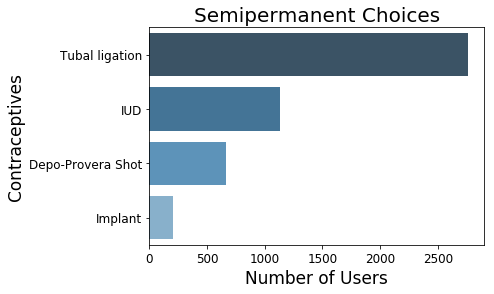

In [39]:
###Plotting from each data frame

# fig = plt.figure(figsize=(8,6))
semiperm_plot = sns.barplot(x = semiperm.CURRMETH1.value_counts(), y=semiperm.CURRMETH1.value_counts().index, palette = "Blues_d")
semiperm_plot.set_xlabel('Number of Users', fontsize = 17)
semiperm_plot.set_ylabel('Contraceptives', fontsize = 17)
semiperm_plot.set_title('Semipermanent Choices', fontsize = 20)
semiperm_plot.tick_params(labelsize = 12)
# imperm = sns.barplot(x = imperm.CURRMETH1.value.counts(), y=imperm.CURRMETH1.value_counts().index, palette = "Blues_d")

# imperm.groupby('CURRMETH1').RSCRAGE.count().plot.bar(ylim=0)
# df.groupby('CURRMETH1').RSCRAGE.count().plot.bar()
plt.show()

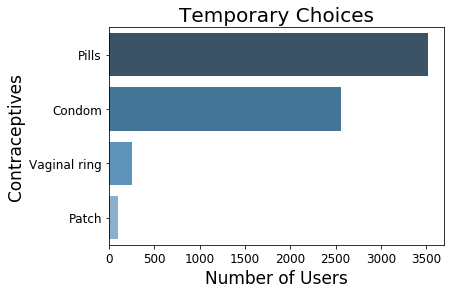

In [38]:
imperm_plot = sns.barplot(x = imperm.CURRMETH1.value_counts(), y = imperm.CURRMETH1.value_counts().index, palette = "Blues_d")
imperm_plot.set_xlabel('Number of Users', fontsize = 17)
imperm_plot.set_ylabel('Contraceptives', fontsize = 17)
imperm_plot.set_title('Temporary Choices', fontsize = 20)
imperm_plot.tick_params(labelsize = 12)

In [ ]:
imperm.head(10)

In [ ]:
imperm.tail(10)

In [41]:
###ONE HOT ENCODING WITH SCI-KIT LEARN

semiperm.columns
one_hot=preprocessing.OneHotEncoder()
semiperm['RSCRRACE'] = one_hot.fit_transform(semiperm['RSCRRACE'])

imperm['RSCRRACE'] = one_hot.fit_transform(imperm['RSCRRACE'])

semiperm['MARSTAT'] = one_hot.fit_transform(semiperm['MARSTAT'])
# semiperm

imperm['MARSTAT'] = one_hot.fit_transform(imperm['MARSTAT'])
imperm

###FROM MATCHING DFS WE KNOW THAT:
# WHITE = 2, HISP = 1, BLACK = 0
# MARRIED = 1, SINGLE = 2, RELATIONSHIP = 0

,RSCRAGE,RSCRRACE,MARSTAT,CURRMETH1,Method
1,24,2,2,Pills,0
2,34,2,2,Pills,0
3,28,2,0,Vaginal ring,1
6,19,2,2,Pills,0
7,39,2,1,Condom,2
10,30,2,1,Pills,0
11,26,2,1,Pills,0
12,27,2,2,Pills,0
13,30,2,1,Pills,0
15,26,2,1,Pills,0


In [43]:
semiperm.to_csv("Semipermanent Choices.csv")

In [44]:
imperm.to_csv("Impermanent Choices.csv")

In [ ]:
###PLOTTING GAUSSIAN NAIVE BAYES MODEL for SEMIPERM types
plt.scatter(y_semiperm_test, clf_semiperm_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')